# PBMC after BC
## Xiaonan Wang
## 27Oct2017

In [1]:
%config InlineBackend.figure_formats = ['retina']  # increase resolution on retina screens
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import scanpy.api as sc
from matplotlib.colors import LinearSegmentedColormap
import sys
sys.path.append('/servers/lila-single-cell/Xiaonan/python_modules/')
from TenX_sub import *

cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.verbosity = 0                # increase for more output
sc.settings.set_dpi(80)                  # low pixel number yields small inline figures
sc.logging.print_version_and_date()

/home/USSR/xw251/anaconda2/envs/mypython3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Running Scanpy version 0.2.3 on 2018-05-11 13:51.


## Read in Data

In [2]:
%%time
PBMC_data = sc.read("PBMC_corrected_all_hvg.txt", cache=True, delimiter="\t")

CPU times: user 10.6 s, sys: 516 ms, total: 11.1 s
Wall time: 12 s


In [3]:
print(PBMC_data.X.shape)

(17119, 1607)


In [4]:
PBMC_data.var_names = np.genfromtxt("PBMC_HVGs_GN.csv", dtype=str, delimiter=",")
PBMC_data.var['Ensembl'] = np.genfromtxt("PBMC_HVGs.csv", dtype=str, delimiter=",")
PBMC_data.smp_names = np.genfromtxt("PBMC_HVGs_CN.csv", dtype=str, delimiter=",")
print(PBMC_data.smp_names[0:5])
print(PBMC_data.var_names[0:5])

['A1_AAACCTGAGCAAATCA-1' 'A1_AAACCTGAGGTTACCT-1' 'A1_AAACCTGCAAAGTGCG-1'
 'A1_AAACCTGCATAACCTG-1' 'A1_AAACCTGCATCCGCGA-1']
['CFH' 'NDUFAF7' 'RHBDD2' 'ITGA2B' 'CRLF1']


In [31]:
PBMC_data.smp['Donor'] = np.genfromtxt("PBMC_HVGs_Cond.csv", dtype=str, delimiter=",")

## TSNE

In [6]:
%%time
sc.tl.tsne(PBMC_data,n_jobs=40)
sc.logging.print_memory_usage()

Memory usage: current 0.33 GB, difference +0.33 GB
CPU times: user 18min 9s, sys: 36min 21s, total: 54min 31s
Wall time: 1min 35s


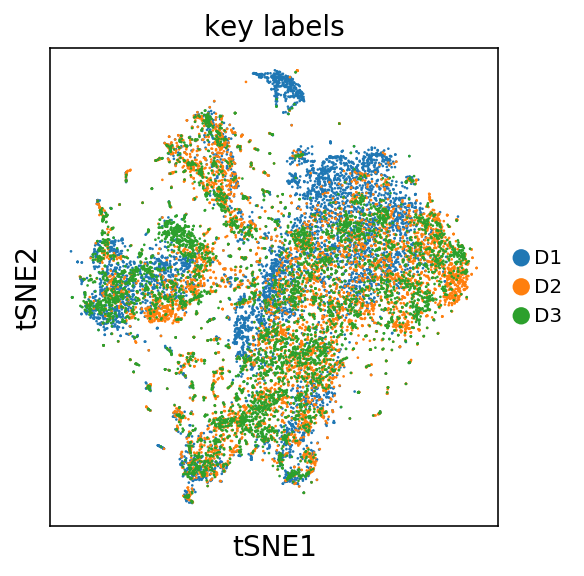

In [7]:
axs = sc.pl.tsne(PBMC_data, color='Donor', legend_loc='right margin', legend_fontsize=10)

## Louvain clustering

In [2]:
PBMC_data = sc.read('PBMC_data_BC_HVG')

In [5]:
%%time
sc.tl.louvain(PBMC_data, resolution=0.4, n_jobs=40, key_added='Louvain_Clusters') #0.6
sc.logging.print_memory_usage()

Memory usage: current 0.31 GB, difference -0.01 GB
CPU times: user 16.9 s, sys: 148 ms, total: 17 s
Wall time: 17 s


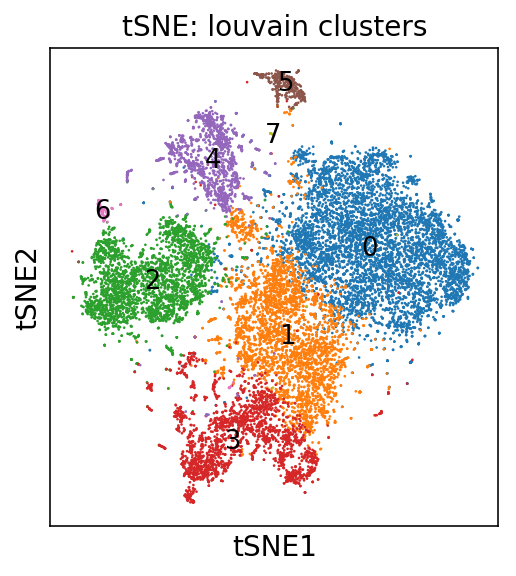

In [6]:
ax = sc.pl.tsne(PBMC_data, color=['Louvain_Clusters'], legend_loc='on data', title='tSNE: louvain clusters')

## Write

In [84]:
sc.write('PBMC_data_BC_HVG', PBMC_data)